In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import pandas as pd

In [4]:
train_df = pd.read_csv(r'C:\Users\Rahul Mathew\Desktop\Python\ML pipeline\train_gplay_reviews.csv')

In [5]:
train_df = train_df.fillna('None')

In [6]:
sentiments_true = train_df['Rating'].tolist()

In [7]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [8]:
X_train, y_train = train_df['Review'], train_df['Rating']

In [9]:
pipeline.fit(X_train, y_train)

,steps,"[('tfidf', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [10]:
test_df = pd.read_csv(r'C:\Users\Rahul Mathew\Desktop\Python\ML pipeline\test_gplay_reviews.csv')

In [11]:
train_df = train_df.fillna('None')

In [12]:
X_test, y_test = test_df['Review'], test_df['Rating']

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.89      0.87      0.88      3340
           0       0.44      0.01      0.02       336
           1       0.91      0.96      0.94      7633

    accuracy                           0.91     11309
   macro avg       0.75      0.62      0.61     11309
weighted avg       0.89      0.91      0.89     11309



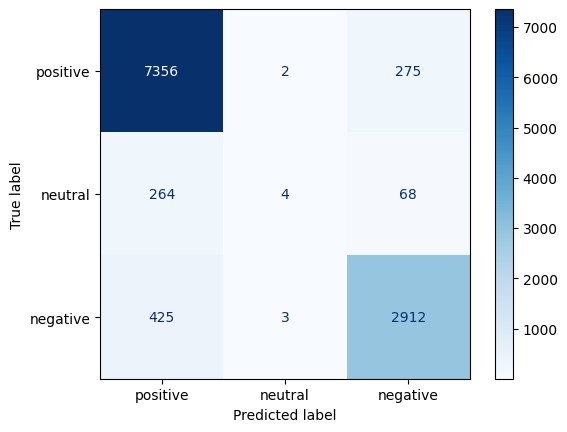

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "neutral", "negative"])
disp.plot(cmap='Blues')
plt.show()

In [18]:
errors = (np.array(y_test) == np.array(y_pred))

In [19]:
wrongly_classified = test_df['Review'][~errors]
len(wrongly_classified)

1037

In [21]:
for item in test_df['Review'][~errors].sample(n=len(wrongly_classified)//10):
    print(item)

best stories ever job less ghar jamai
this app is good
call me
average
comedy books are less. regional language like marathi books are not there.
Just getting started.
you are too ahti congress and oro bjp
very cheap app
good
It was good
good
best
Dumka
Socha Hai Lekin continue nahin kar rahe ho aap continue please
best
Nice stories and all But it didn't give me my 30 days trial period though I submitted my student ID
Wish there was other ways to earn coins or unlock the episodes in a 24 hour period. Some apps offer game play to earn coins.
good
still not opening
Just when you have nothing to do
jh ci
Best in aap
Not bad
That's good but I need Ancient story example -number zero,Romeo ki rasleela,shoorveer.
I am premium member. please add download in external storage. because my internal is 64gb already maximum filled. Please add notes making option. Also add notes in separation option to view all book notes in a view. Without notes making we forgot important points, names, statistics, 

### Among the True Positives the wrongly classified ones are mostly Predicted as Negative

So find out all the reviews which are actually Positive (True Positive) but predicted as Negative (False Negative)

In [26]:
ind_tp = np.where(y_test == 1)[0]
ind_pred_neg = np.where(y_pred == -1)[0]

common = np.intersect1d(ind_tp, ind_pred_neg)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(test_df['Review'][i])

kukufm story is really amazing.i many stories completed in 2019 around.then kukufm allow prices.after this I joined pocket fm the concept was also the same they would give some ep.you will not believe me anyway I must have invested thousands of there on that app. i havebeen using kuku for almost 3+years and there is story in this app which was not completed in last 24.i was listened that story 2018-2019.the name of that story is mai tere pyar me pagal.wherever it is, kukufm storie truly amazing.
Excellent voice dawnload per only wifi diya hai. Mobile network bhi hona chahiye. Apne hi mobile network per dawnload karne par app apne aap hi close ho jata hai. Dawnload hota hi nahi hai.
There should be an option to earn coin through watching ads.
so sad problem
better but video not
Refund
buffering issue
Make sure about the autopay which can take ur money without ur pin
The app shows annual subscription with 50% discount but there is no discount or coupon code.
Maine yah app download kiya t

A lot of the reviews are mostly questions not negative reviews themselves

### Among the True Neutrals the wrongly classified ones are mostly Predicted as Positives

So find out all the reviews which are actually Neutral (True Neutral) but predicted as Positives (False Positive)

In [27]:
ind_tn = np.where(y_test == 0)[0]
ind_pred_p = np.where(y_pred == 1)[0]

common = np.intersect1d(ind_tn, ind_pred_p)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(test_df['Review'][i])

best
good
greet app
It us good
super
best performance
Good for books lover
gud
Good
good story
good app
good
That's good but I need Ancient story example -number zero,Romeo ki rasleela,shoorveer.
Super such a great audio book kuku fm offcourse Ienjoyed alot
nice
nice
Nice story
Good
good
Good
good
Nice
This is good
Nice app,but mathliy plan jyada h free hona cahiye app ya km plan hona cahiye mathliy ka
good
Nice


From the above examples its pretty clear that these are mostly single words like 'Nice', 'Good' which can be considered as Neutral or Positive

### Among the True Negatives the wrongly classified ones are mostly Predicted as Positive

So find out all the reviews which are actually Negative (True Negative) but predicted as Positive (False Positive)

In [28]:
ind_tneg = np.where(y_test == -1)[0]
ind_pred_p = np.where(y_pred == 1)[0]

common = np.intersect1d(ind_tneg, ind_pred_p)

for i in np.random.choice(common, size=len(common)//10, replace=False):
    print(test_df['Review'][i])

Nice
Love you too
thank for this app
best app
Can't able to add notes know:(
permission
Nice app
jh ci
nice
good
good
verry baid bakbas app hai
So sorry
This is very chipe app
you fooled me
vari bat
everything is primium
nice
just
App bnan ali di maa da fudda
Nice
forgery..with kuku fm..
Best
Sera app
Price is huge
Nice
good
I was looking for a Gujarati language book on your app but I couldn't find it anywhere.
nice
Miya Khalifa
Stopied
unable to change audio language
nice ap kuku fm
But it's memberships is really dispoiting
subcription rate very high
Bakvass
bewakuf bana te hai
Meri Marzi
silent son in law malayalam version
good
Coins wala hatao
Nice aap


From the above examples it is clear that these are written in English but the meaning is in Hindi, Telugu, Tamil, etc